<p><font color="gray">
    <h1 align="Center">AFRICAN SCHOOL OF ECONOMICS </h1>
 <p><font color="blue">   
    <h1 align="Center">__________________________ </h1>
<p><font color="gray">
   <h2 align="Center">Speciality: Master in Mathematics, Economics and Statistics </h2>
<p><font color="white">
    <h2 align="Center">_________________________ </h2>
<p><font color="gray">
    <h3 align="Center">Subject: Quantitative Economics </h3>
<p><font color="blue">
    <h3 align="Center">_______________________ </h3>
<p><font color="gray">
    <h4 align= "Center">Final project </h4>
<p><font color="white">
    <h4 align="Center">____________________ </h4>
<p><font color="brown">
    <h4 align="Center">Written by: Jesugnon David Javier KOUMAGNON </h4>
    

In [2]:
# Packages or libraries used
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.arima_process import ArmaProcess
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import bernoulli, uniform

###  $Exercise$ $1:$ $Dynamic$ $equations$
- Write a Python function to simulate an AR(p) process
- Plot the simulated data.

The AR process uses three parameters:
- ord: order of the AR process which is an integer
- coefar: coefficients of the AR process which is a list of float
- n: number of observations to generate which is also an integer.  

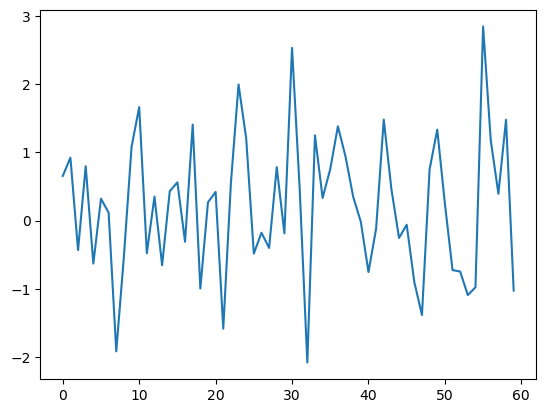

In [23]:
def simul_AR(ord, coefar, n):
    ma = np.array([1])
    ar = np.r_[1, -np.array(coefar)]
    pro_arma = ArmaProcess(ar, ma)
    return pro_arma.generate_sample(nsample=n)

# Simulation with my own parameters ( AR of order 2)
n, ord, coefar = 60, 2, [0.27, -0.1]
ar2= simul_AR(prs, coefar, n)
plt.plot(ar2)
plt.show()

###                         $Exsercise$ $2$: $Law$ $of$ $Large$ $number$ $and$ $Central$ $Limit$ $theorem$

In [33]:
# 1- Generate a random sample of size 500 from a population with a finite mean and variance.

# Settings of my parameters
pop_mean = 50
pop_var = 100
samp_size = 500
# Generation of the sample
rand_sample=np.random.normal(pop_mean,np.sqrt(pop_var),samp_size)

In [35]:
# 2- Calculate the sample mean and sample standard deviation.
s_mean = np.mean(rand_sample)
stand_dev = np.std(rand_sample)
print("The mean of the sample is :", np.mean(rand_sample), "and the standard deviation is", np.std(rand_sample))

The mean of the sample is : 50.35183364252898 and the standard deviation is 9.883855024835668


In [36]:
# 3- Repeat steps 1 and 2 for a large number of times (1000)
n_samples = 1000
# The sample means is a list thst contain each sample means then we csn initialize it with an empty list
sample_means = []
for k in range(n_samples):
    #  creation of random sample of size 500 from the population
    samples = np.random.normal(pop_mean, np.sqrt(pop_var), samp_size)
    
    # Computing of the sample mean and sample standard deviation
    sample_mean = np.mean(samples)
    sample_means.append(sample_mean)

Text(0, 0.5, 'Frequency')

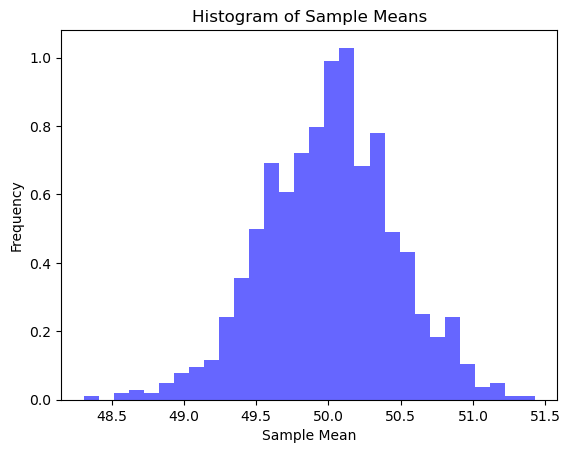

In [9]:
# 4- Plot a histogram of the sample means
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='b', label='Sample Means')
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

The distribution of the sample means is called the _"sampling distribution of the sample mean" or "sampling distribution."_

 the sampling distribution of the sample mean approximates a normal distribution.

The name of this law is __Central Limit Theorem__

In [22]:
# 5- Calculate the mean and standard deviation of the sample means
sample_means_avg = np.mean(sample_means)
sample_means_std = np.std(sample_means)
print("Sample Means Mean:", sample_means_avg)
print("Sample Means Standard Deviation:", sample_means_std)

Sample Means Mean: 50.00604503941517
Sample Means Standard Deviation: 0.468549986675479


6- Comparing the population parameters to the sample parameters we can notice that the sample means is too close to the population mean and the standard deviation is less than the Sample Means Standard Deviation which is close to zero.

In [24]:
# 7- 
# The standard deviation of the sample mens is callled the Standard error of the mean,
# which is equal to the square root of the population variance over the square root of the sample size
# To get the the standard deviation of the population from the standard deviation of the samples means, we can divide Standard error of the mean by the square root of the sample size.

standard_error = np.sqrt(pop_var) / np.sqrt(samp_size)
print("Standard Error :", standard_error)

Standard Error : 0.4472135954999579


 8- Effect of increasing sample size:

When the sample size increase, the sample mean gets closer to the population mean, and the standard deviation of the sample means approaches 0.

 9- The name of this law:

 The name of this law is the __"Law of Large Numbers"__.

## $Exercise$ $3$: $Monte$-$Carlo$ $and$ $option$ $pricing$
Our purpose is to create an American Put class

In [44]:
# As set by the exercise the name of the class is AmericanPut
class AmericanPut:
    # Parameters of the class
    def __init__(self, K, T, r, sigma, N, M):
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.N = N
        self.M = M
    # Basis functions
    def basis_functions(self, x):
        return np.column_stack((np.ones_like(x), x, x**2, x**3))
    # Payoff
    def payoff(self, S):
        return np.maximum(self.K - S, 0)
    # Paths
    def generate_paths(self):
        dt, S0, S  = self.T / self.N, 100, np.zeros((self.M, self.N+1))
        S[:, 0] = S0
        for i in range(self.N):
            eps,drift = np.random.normal(size=self.M), (self.r - 0.5 * self.sigma**2) * dt
            volatility = self.sigma * np.sqrt(dt) * eps
            S[:, i+1] = S[:, i] * np.exp(drift + volatility)
        return S

    # Calculate Payoff
    def calculate_payoff(self, S):
        return self.payoff(S)

    # Backward induction
    def backward_induction(self, S, payoffs):
        option_values = np.zeros_like(S)
        option_values[:,-1] = payoffs[:,-1]
        for i in reversed(range(self.N)):
            # Specification of the variables to fit the regression
            X, Y = self.basis_functions(S[:, i]), np.exp(-self.r * self.T / self.N) * option_values[:, i+1]
            # coefficient of the regression using the curve_fit
            coeffs, _ = curve_fit(lambda X, a, b, c, d: a*X[:,0] + b*X[:,1] + c*X[:,2] + d*X[:,3], X, Y)
            continuation_values, cycle_values = coeffs[0]*X[:,0] + coeffs[1]*X[:,1] + coeffs[2]*X[:,2] + coeffs[3]*X[:,3], payoffs[:, i]
            # Computing of the list of options values
            option_values[:, i] = np.where(cycle_values > continuation_values, cycle_values, np.exp(-self.r * self.T / self.N) * option_values[:, i+1])
        return option_values

    # Calculate option_value
    def calculate_option_value(self, option_values):
        return np.mean(option_values[:, 0])

    #calculate_option
    def calculate_option(self):
        S = self.generate_paths()
        payoff = self.calculate_payoff(S)
        option_values = self.backward_induction(S, payoff)
        option_value = self.calculate_option_value(option_values)
        
        return option_value

# Simulation
K, T, r, sigma, N, M = 100, 1, 0.05, 0.2, 100, 1000

opt1 = AmericanPut(K, T, r, sigma, N, M)
option_value = opt1.calculate_option()
print(f"The option value is: {option_value}")

The option value is: 6.267844858304732


### $Exercise$ $4$: $Simple$ $Bank$ $Account$ $System$

Our purpose is to create accounts in bank and do some transactions between accounts

In [7]:
# Definition of the class Account

class Account:
    def __init__(self, acc_num, acc_hold_name, acc_bal=0):
        self.acc_num = acc_num
        self.acc_hold_name = acc_hold_name
        self.acc_bal = acc_bal

    # Account details
    def dis_acc_det(self):
        print(f"Here are the following details for your account: \nAccount Number: {self.acc_num}")
        print(f"Account Holder Name: {self.acc_hold_name}")
        print(f"Account Balance: ${self.acc_bal:.2f}")

    # Withdraw
    def withdraw(self, money):
        if 0 < money <= self.acc_bal:
            self.acc_bal -= money
            print(f"${money:.2f} have deen withdrawn from {self.acc_hold_name}'s account.")
        else:
            print("You don't have enough money in your account.")

    # Deposit
    def deposit(self, money):
        if money > 0:
            self.acc_bal += money
            print(f"${money:.2f} The deposit has been operated properly into {self.acc_hold_name}'s account.")
        else:
            print("Give the real amount of your deposit.")

    # Tranfer
    def transfer(self, oth_acc, money):
        if 0 < money <= self.acc_bal:
            self.acc_bal -= money
            oth_acc.acc_bal += money
            print(f"${money:.2f} transferred from {self.acc_hold_name} to {oth_acc.acc_hold_name} 's account.")
        else:
            print("The transfer cannot be made.")

    # Bank
class Bank:
    def __init__(self):
        self.accs = []

    # Add bank account
    def add_acc(self, acc):
        self.accs.append(acc)
        print(f" {acc.acc_hold_name}'s account has been added to our bank.")

    # Displaying bank account
    def display_accs(self):
        print("List of Accounts in our Bank:")
        for acc in self.accs:
            print(f"Account Number: {acc.acc_num}")
            print(f"Account Holder Name: {acc.acc_hold_name}")
            print(f"Account Balance: ${acc.acc_bal:.2f}")
            print("----------")

    # Remove bank account
    def remove_account(self, acc):
        if acc in self.accs:
            self.accs.remove(acc)
            print(f" {acc.acc_hold_name}'s account has been removed from our bank.")
        else:
            print("Your account has not been found in our bank.")
    

# Simulation
bank = Bank()
acc1 = Account("002345671001", "Mirabelle", 2000)
acc2 = Account("002345634581", "David", 1500)
acc3 = Account("002645614581", "Parterne", 500)

bank.add_acc(acc1)
bank.add_acc(acc2)
bank.add_acc(acc3)
print("----------")

acc1.dis_acc_det()
acc2.dis_acc_det()
acc3.dis_acc_det()
print("----------")

acc3.deposit(900)
acc1.withdraw(50)
acc3.transfer(acc2, 1000)
print("----------")

bank.display_accs()

bank.remove_account(acc3)
print("----------")

bank.display_accs()

 Mirabelle's account has been added to our bank.
 David's account has been added to our bank.
 Parterne's account has been added to our bank.
----------
Here are the following details for your account: 
Account Number: 002345671001
Account Holder Name: Mirabelle
Account Balance: $2000.00
Here are the following details for your account: 
Account Number: 002345634581
Account Holder Name: David
Account Balance: $1500.00
Here are the following details for your account: 
Account Number: 002645614581
Account Holder Name: Parterne
Account Balance: $500.00
----------
$900.00 The deposit has been operated properly into Parterne's account.
$50.00 have deen withdrawn from Mirabelle's account.
$1000.00 transferred from Parterne to David 's account.
----------
List of Accounts in our Bank:
Account Number: 002345671001
Account Holder Name: Mirabelle
Account Balance: $1950.00
----------
Account Number: 002345634581
Account Holder Name: David
Account Balance: $2500.00
----------
Account Number: 002645

### $Exercise$ $5$: $Bayesian$ $updating$
Our goal is to estimate the posterior distribution of the parameter theta, which represents the probability of a recession in a given year.

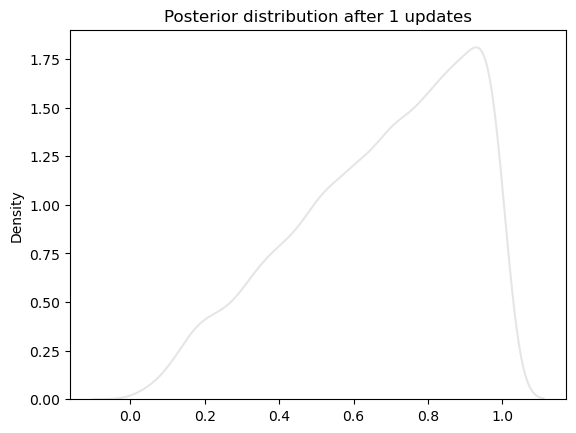

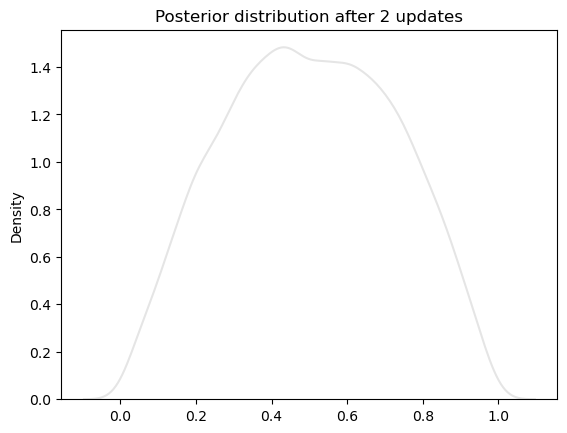

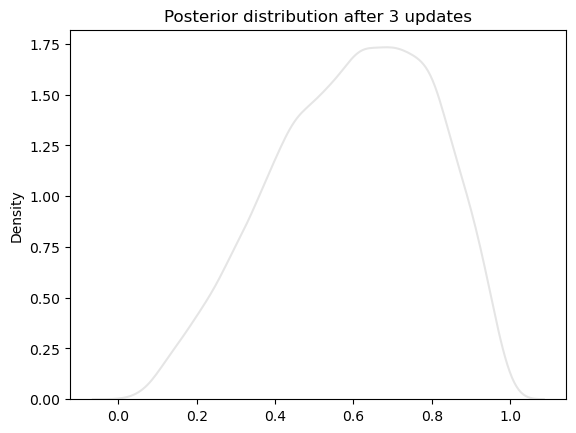

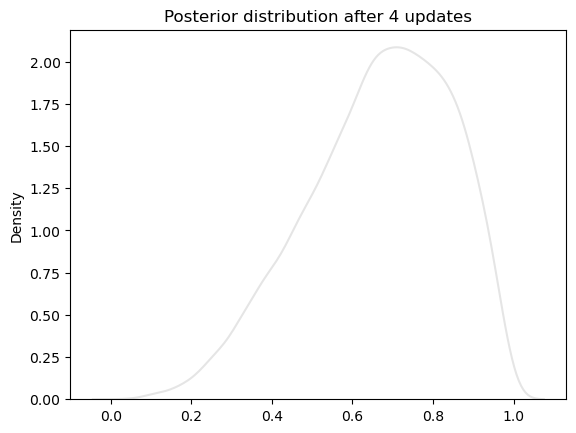

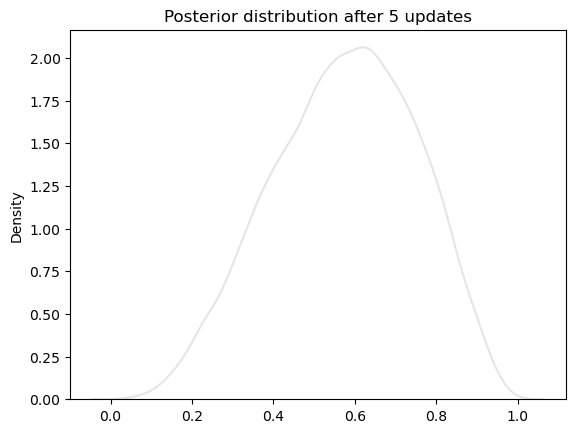

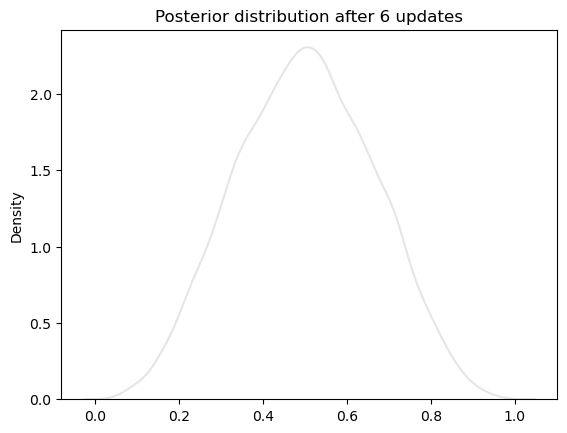

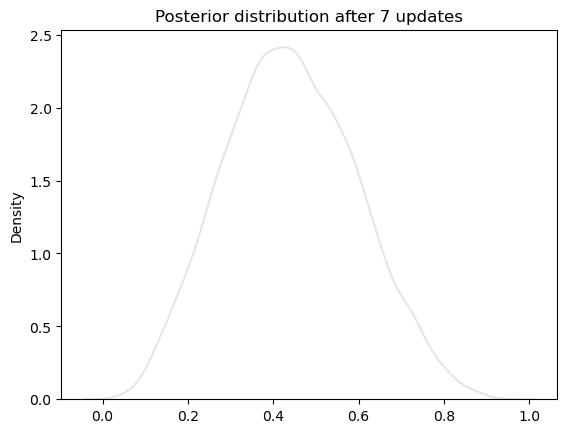

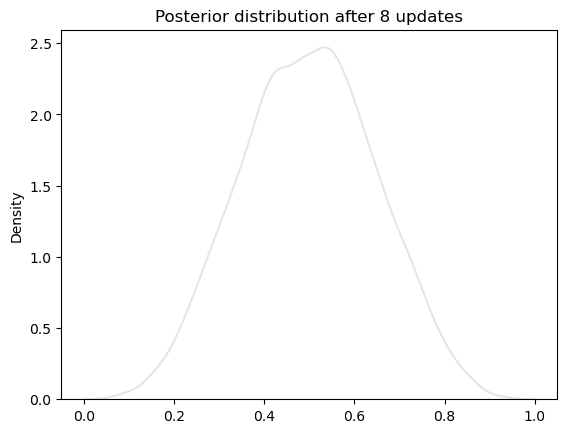

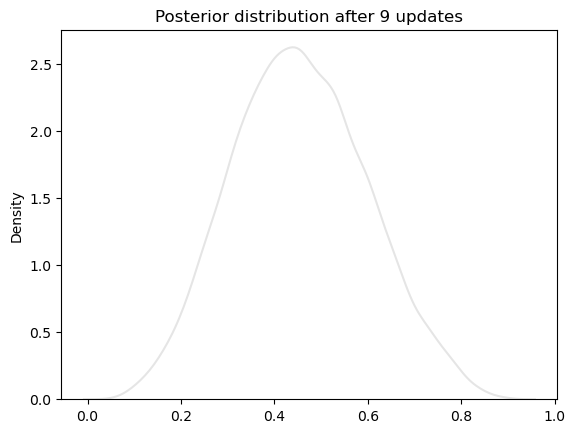

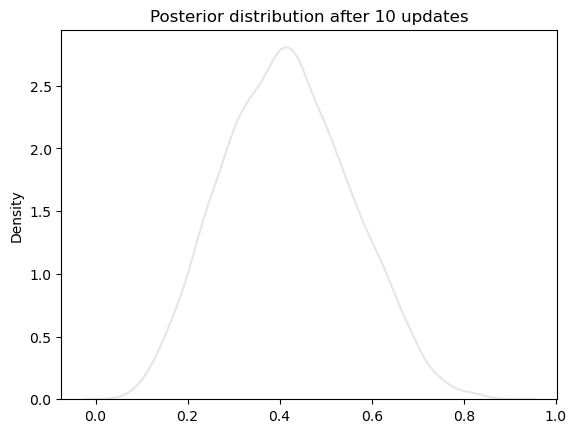

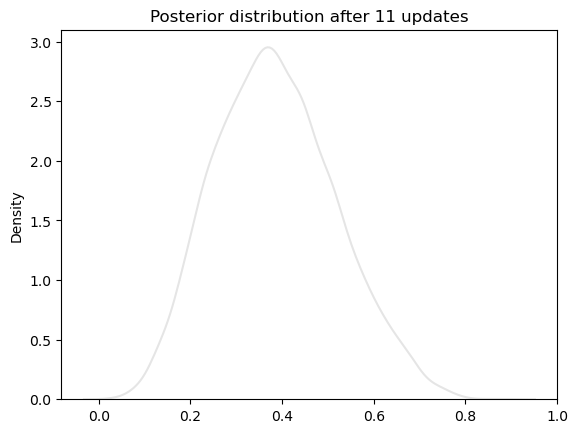

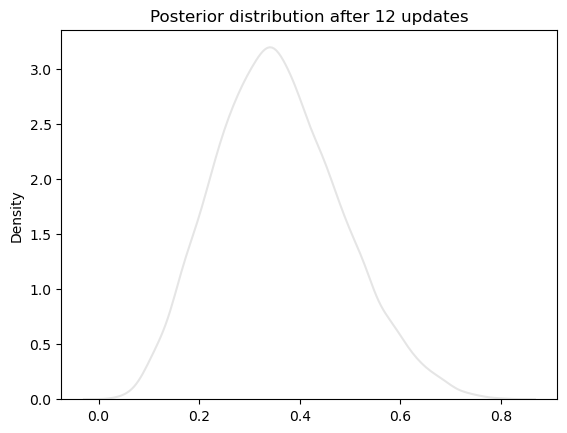

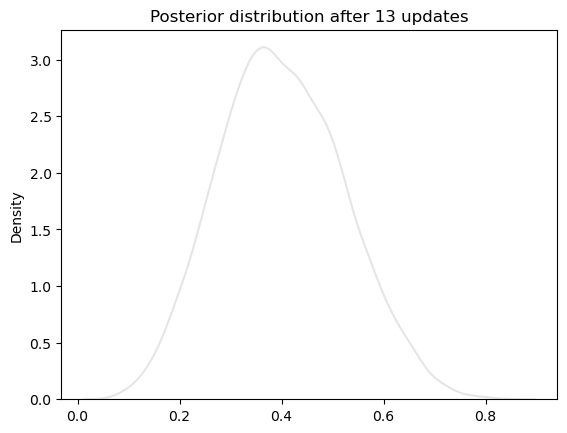

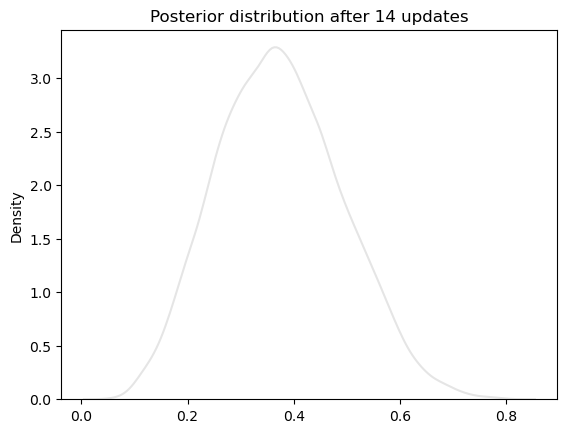

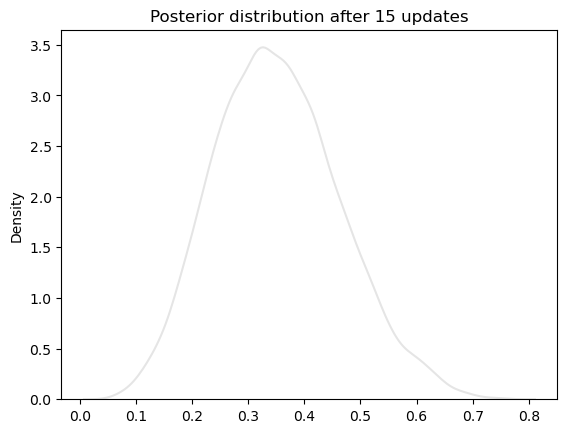

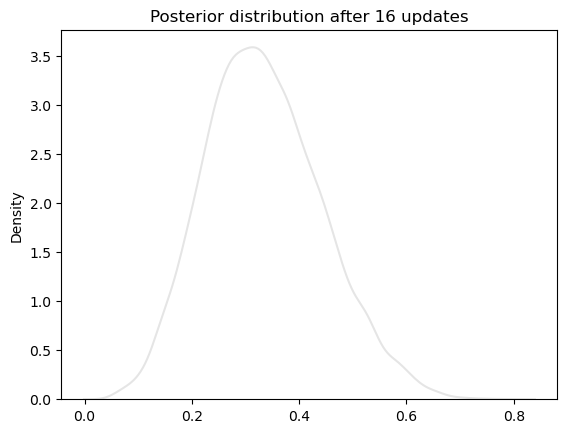

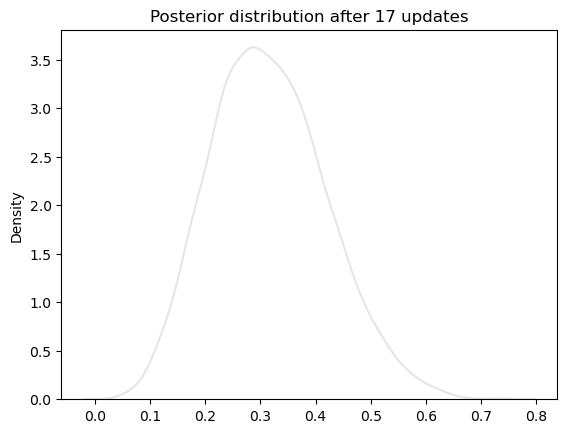

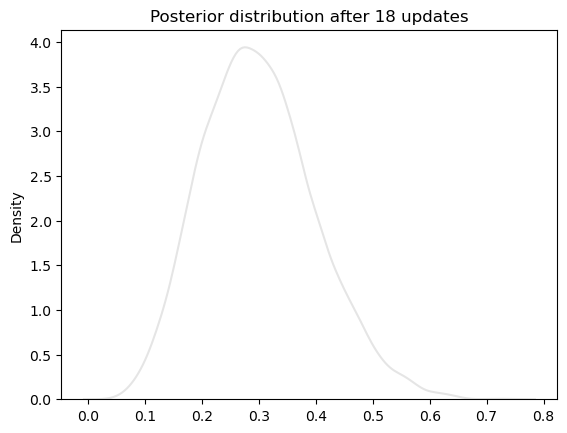

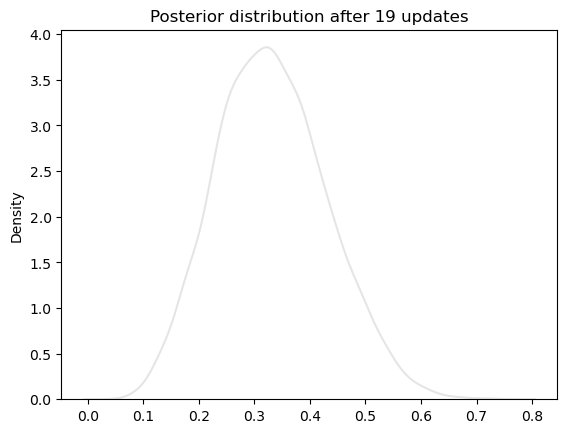

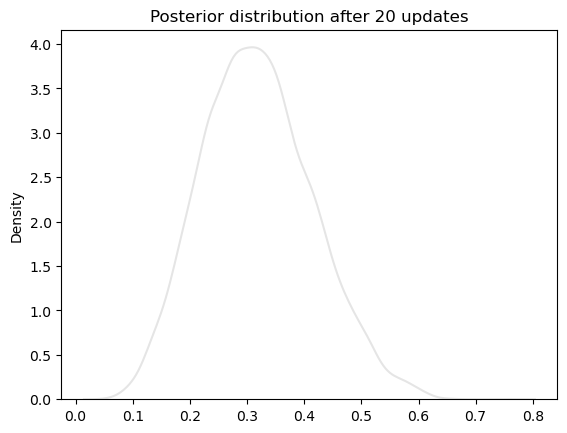

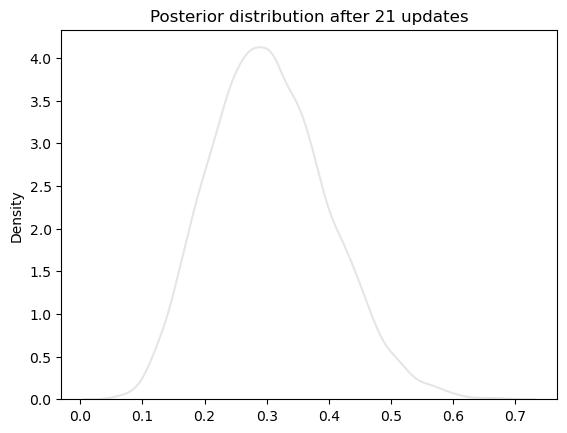

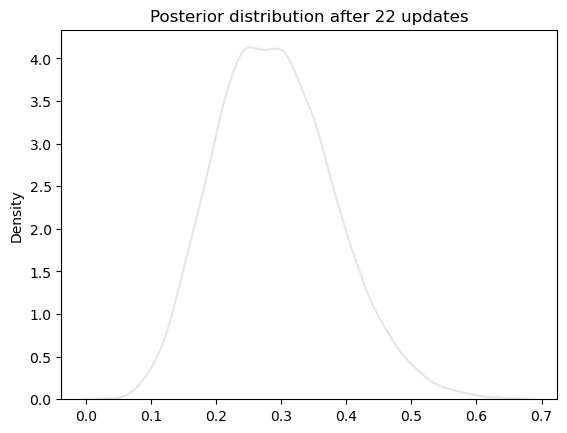

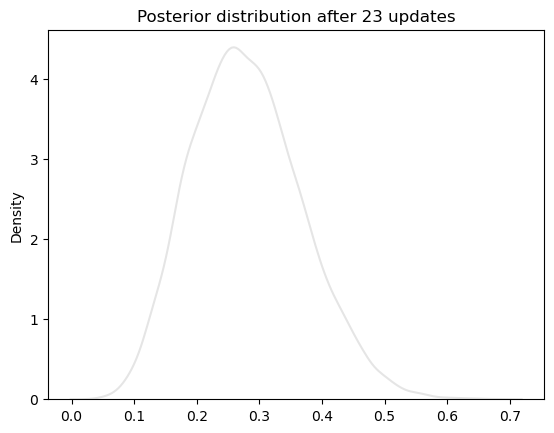

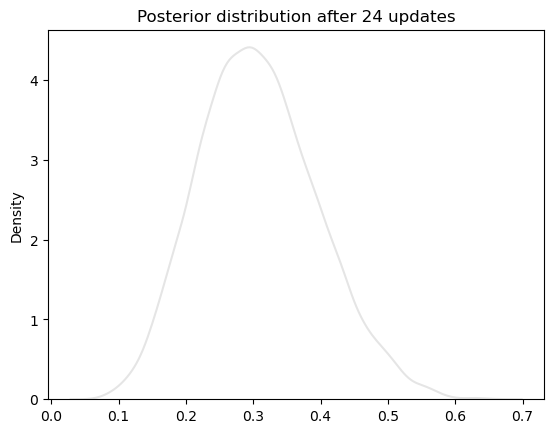

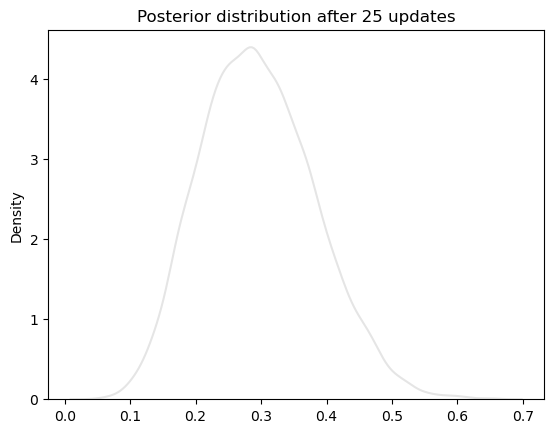

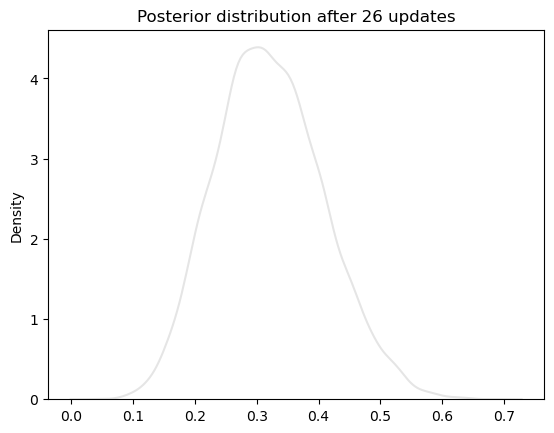

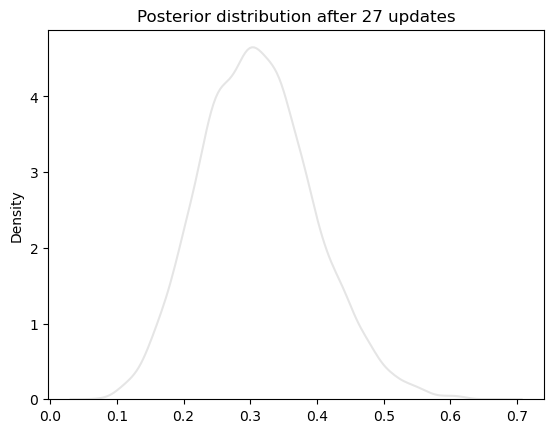

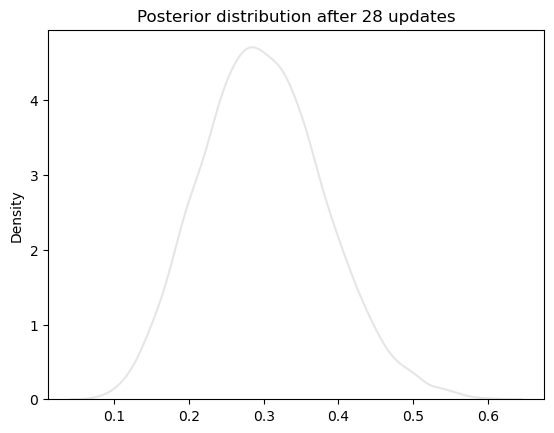

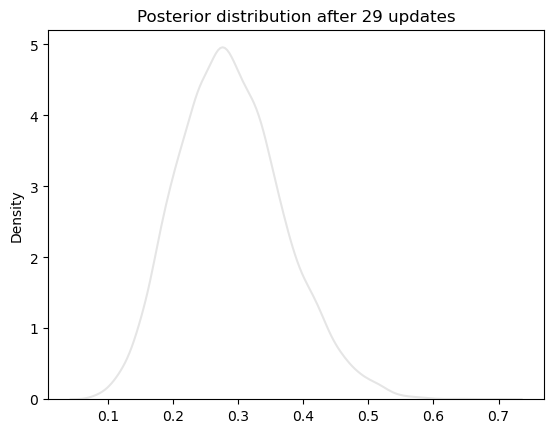

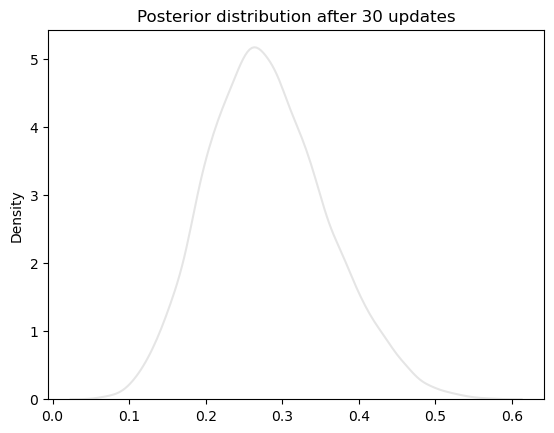

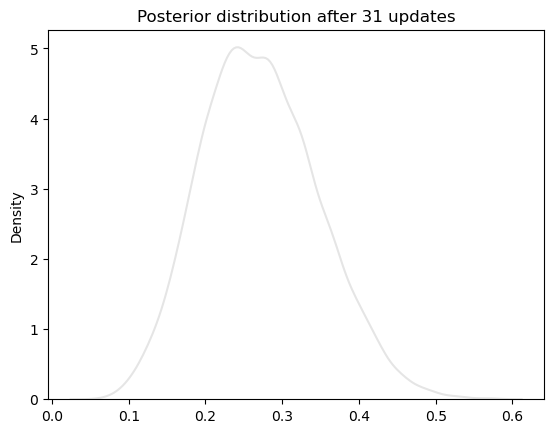

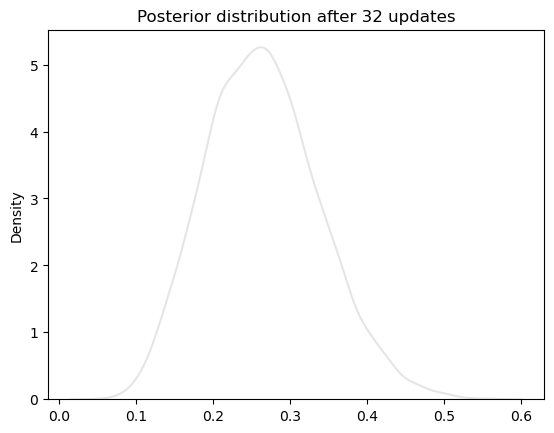

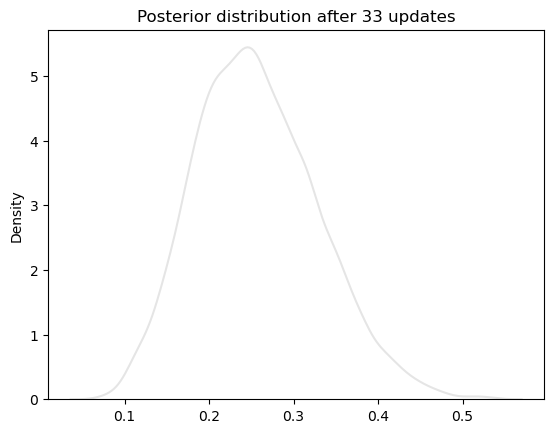

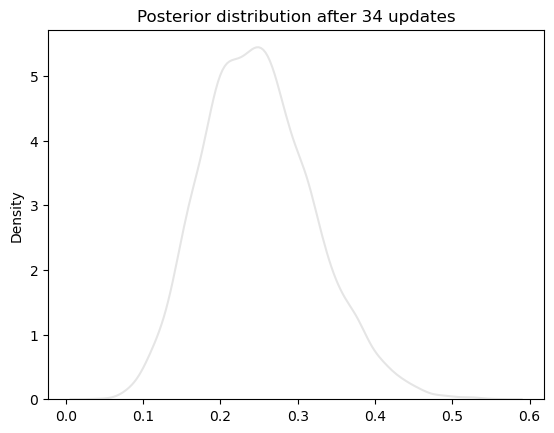

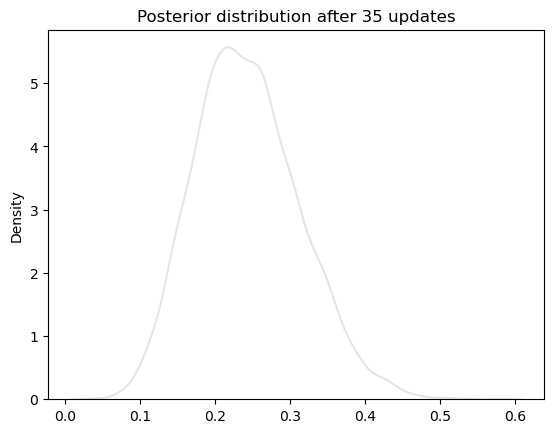

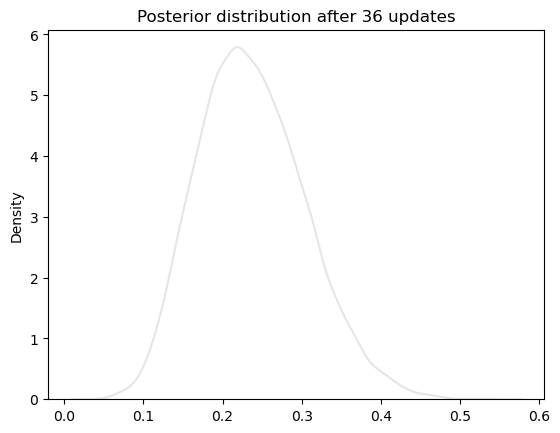

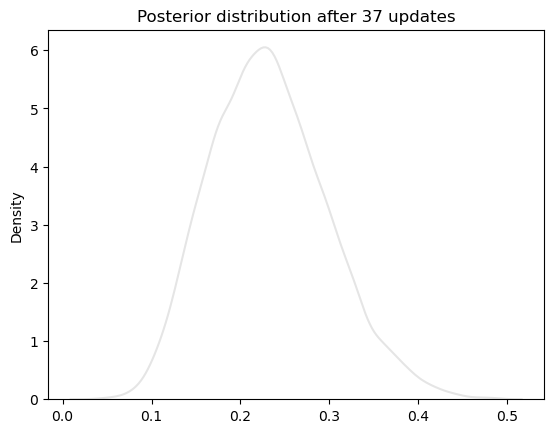

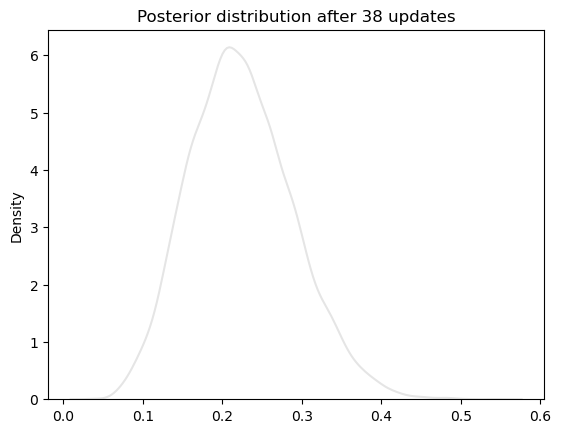

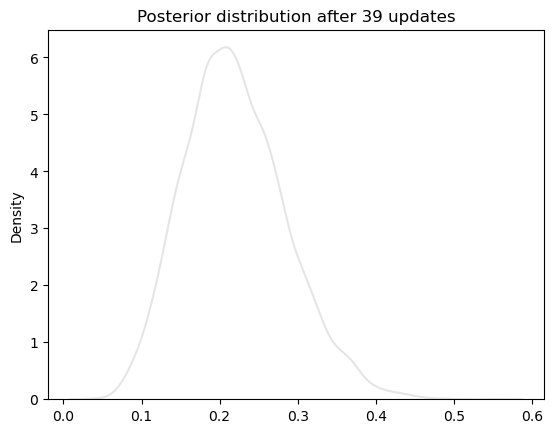

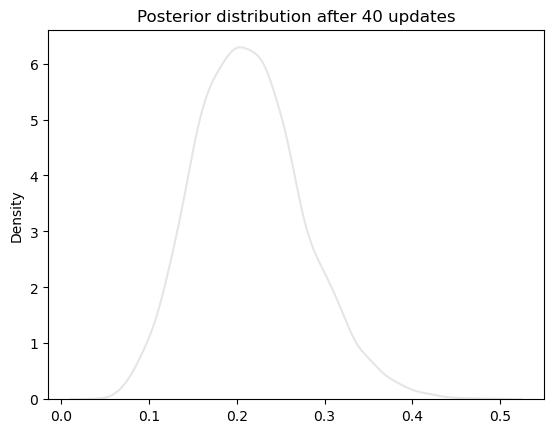

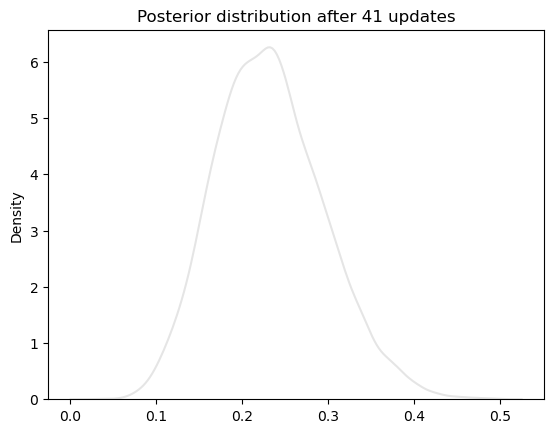

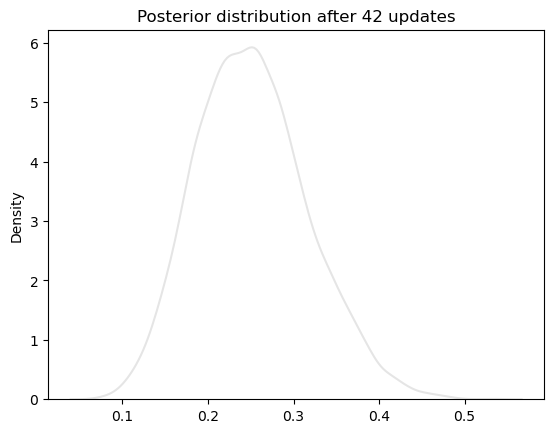

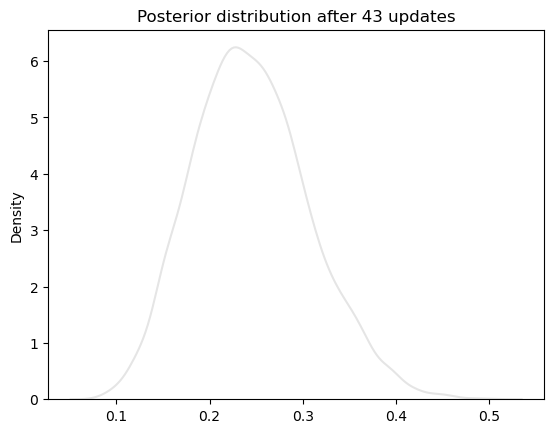

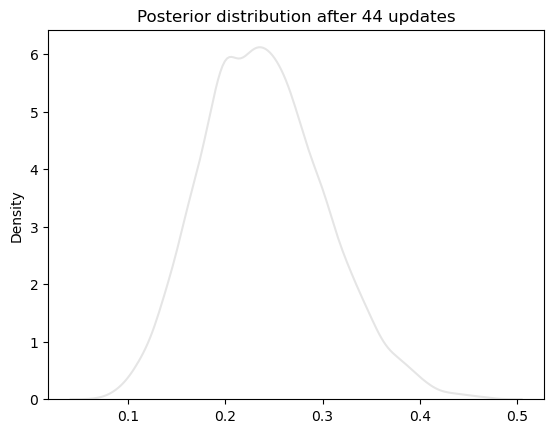

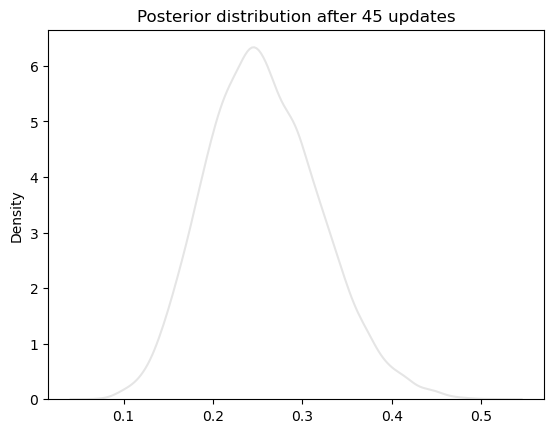

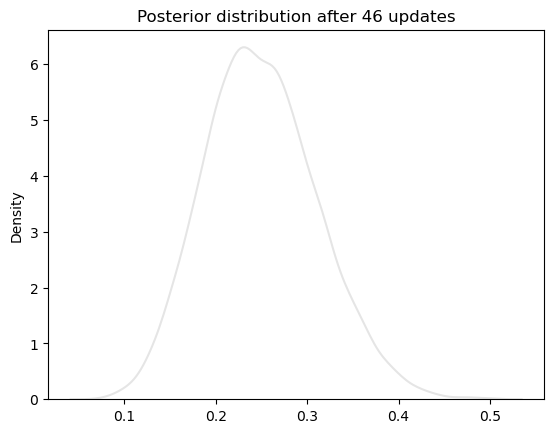

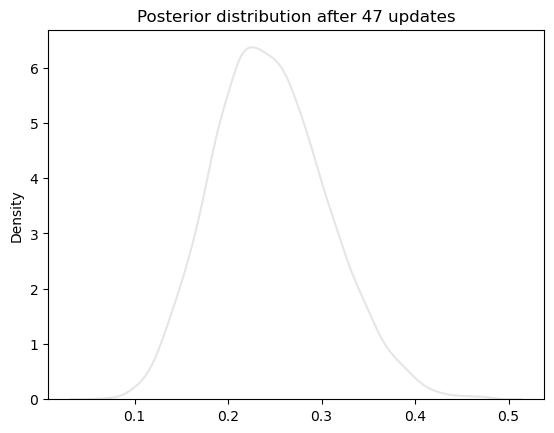

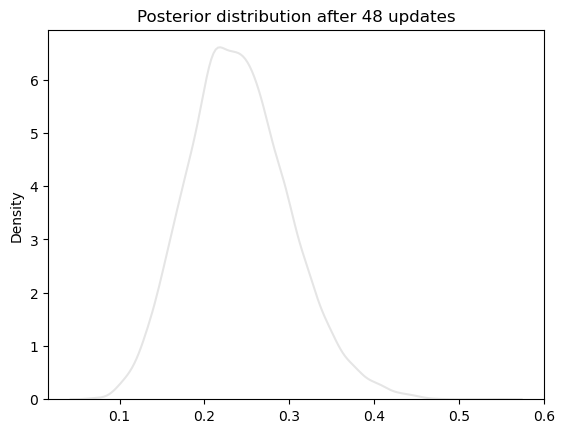

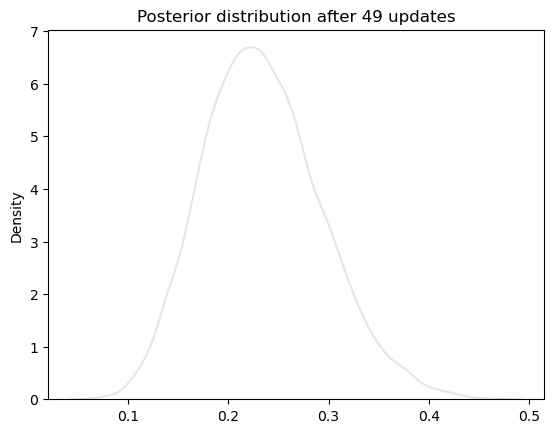

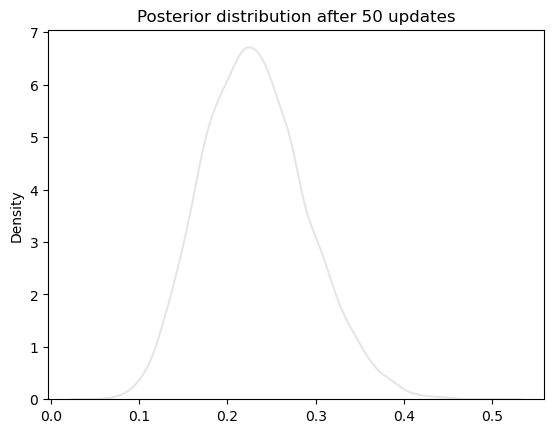

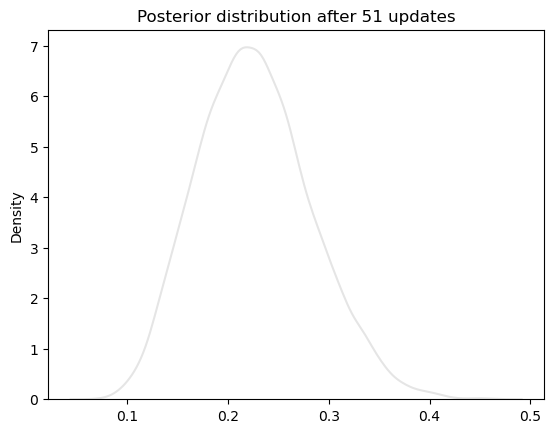

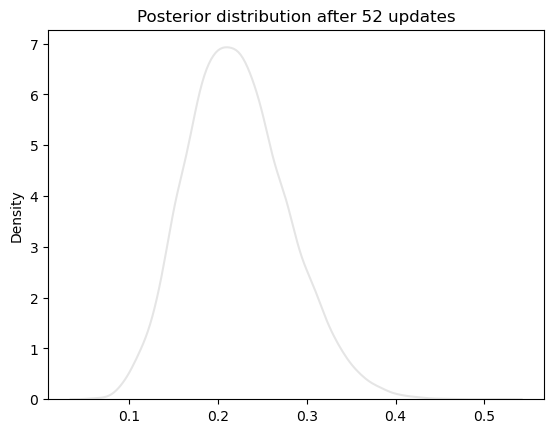

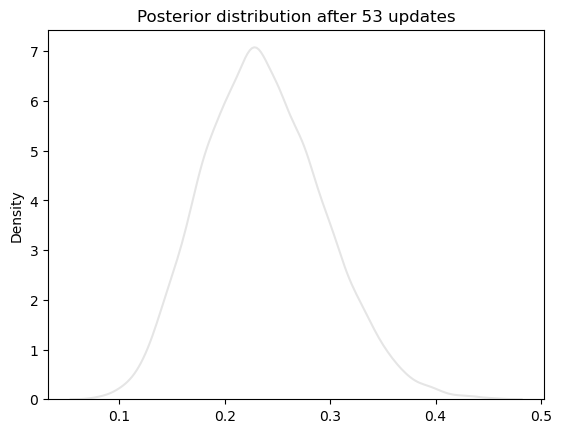

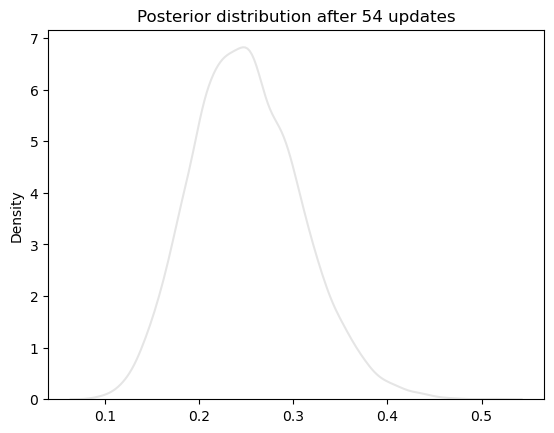

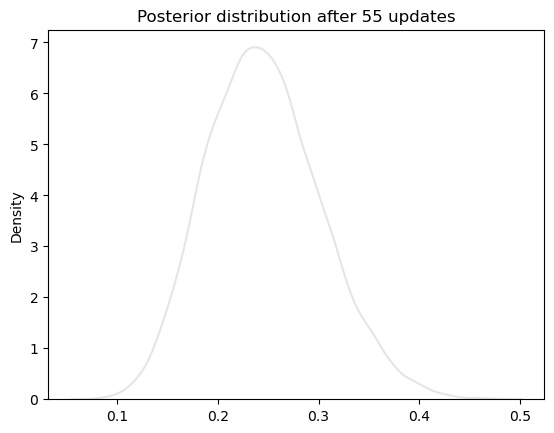

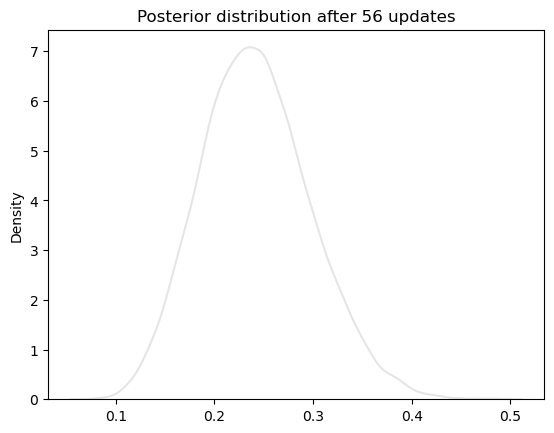

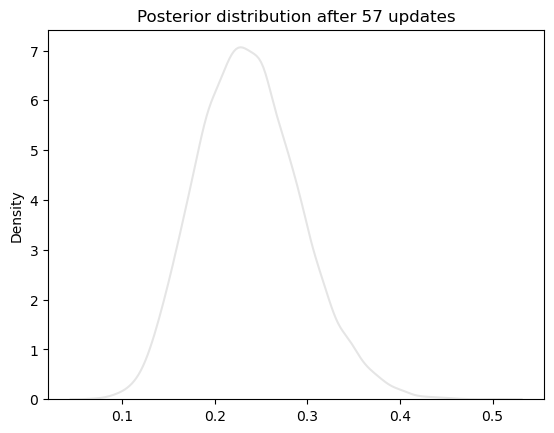

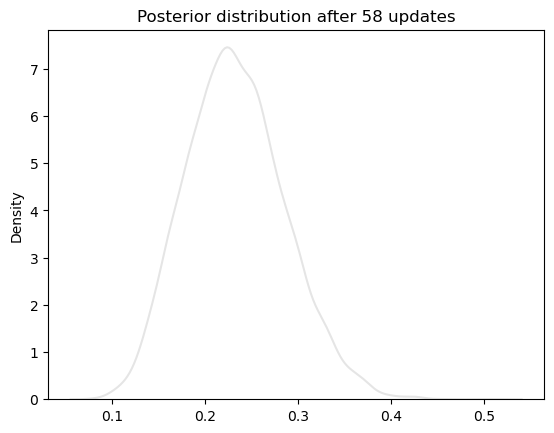

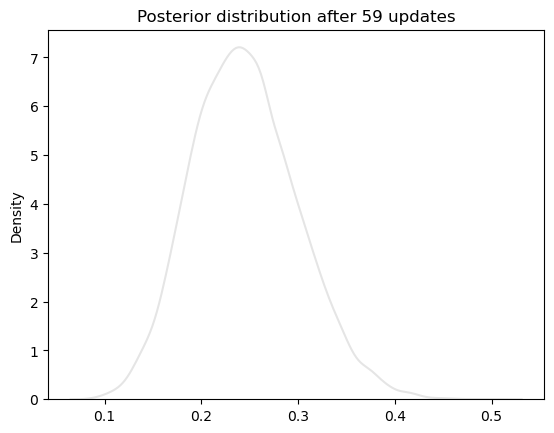

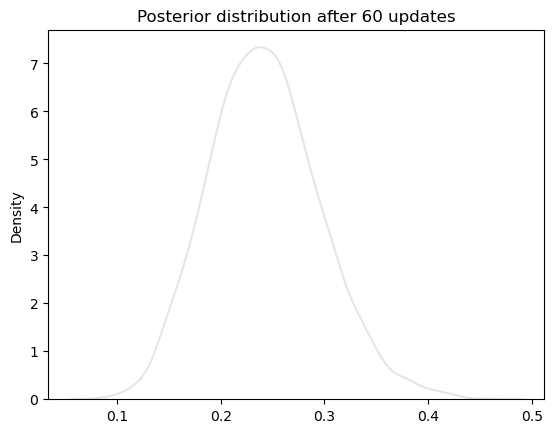

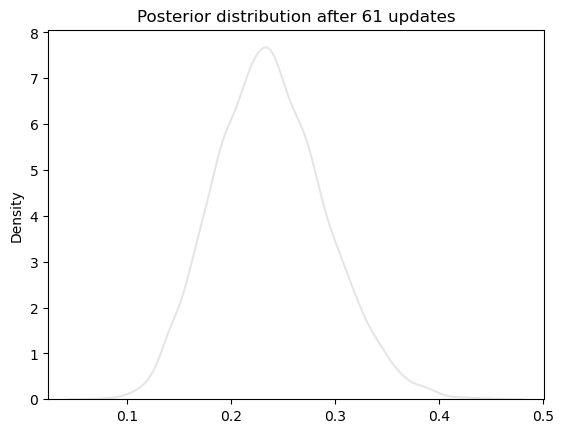

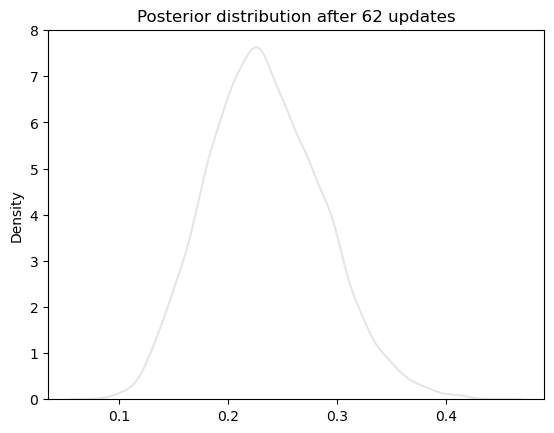

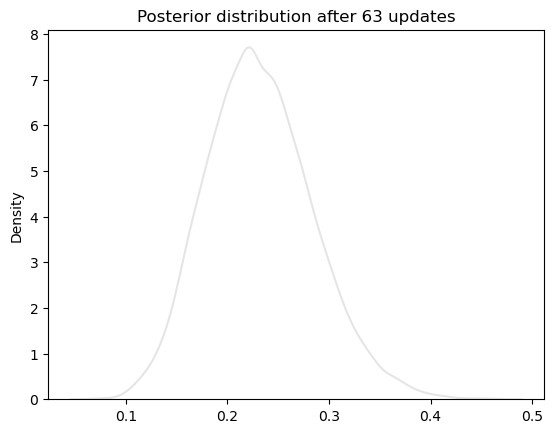

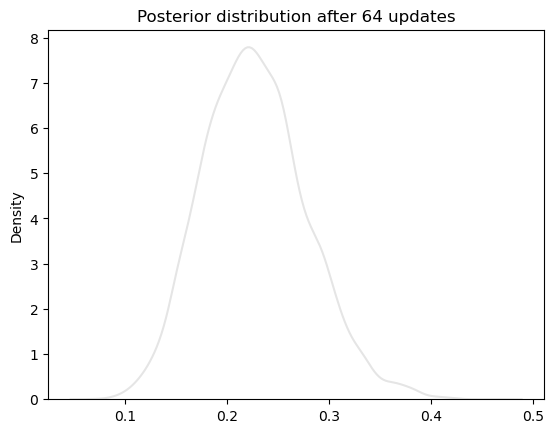

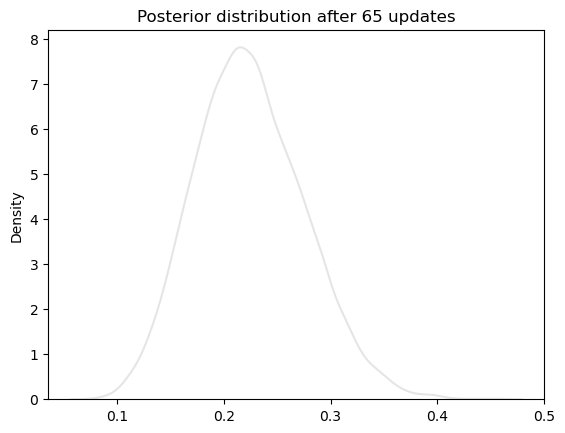

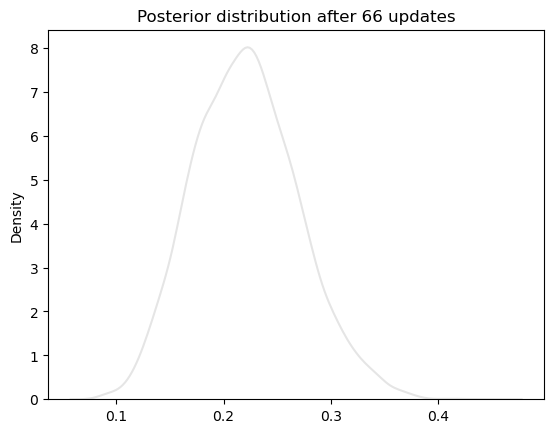

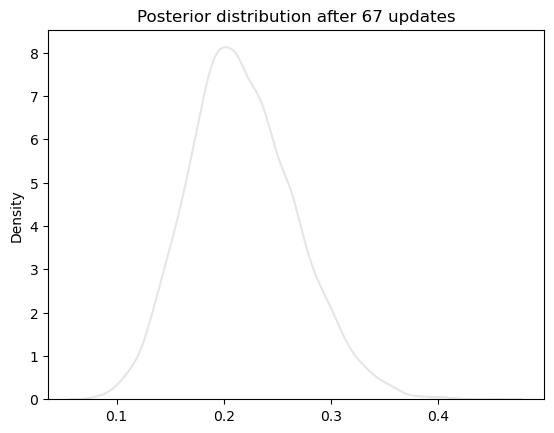

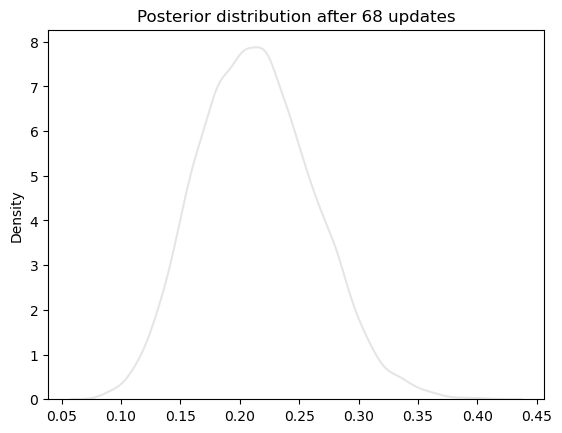

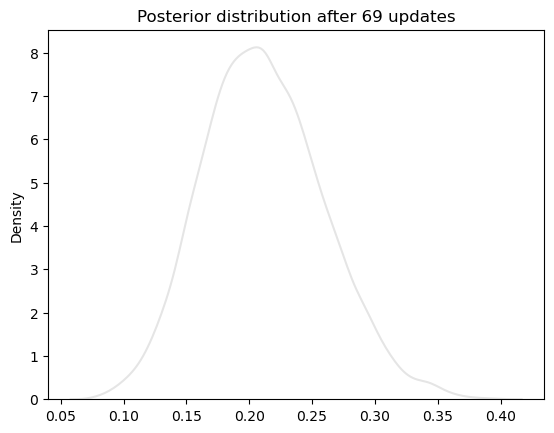

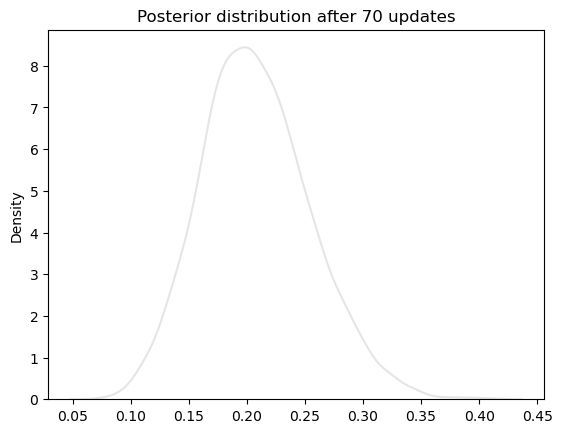

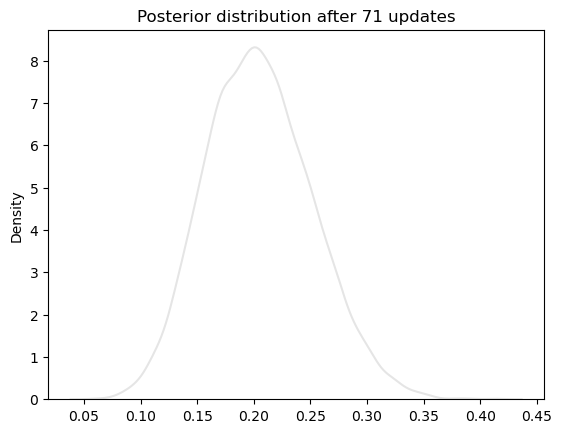

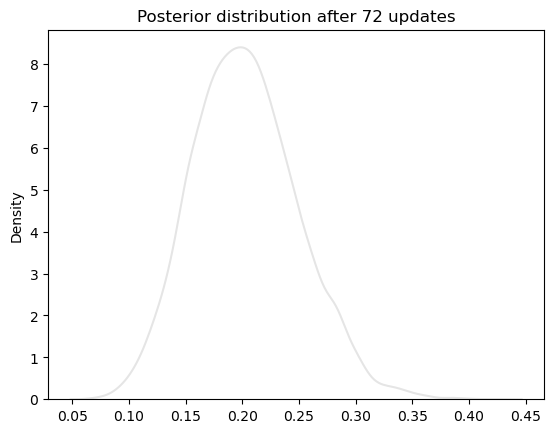

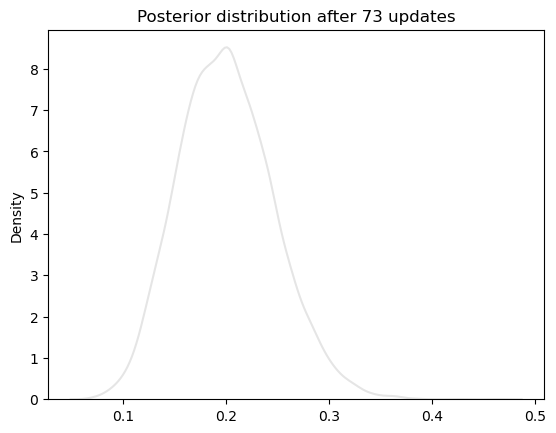

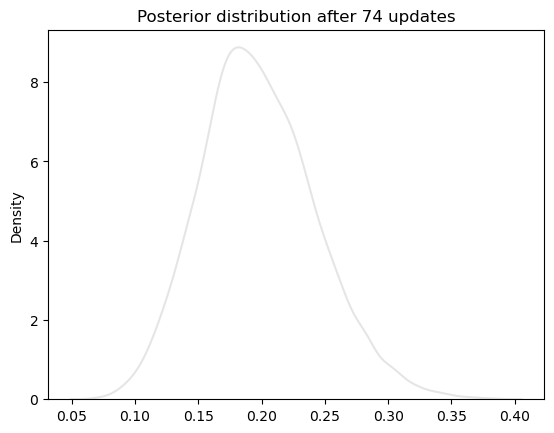

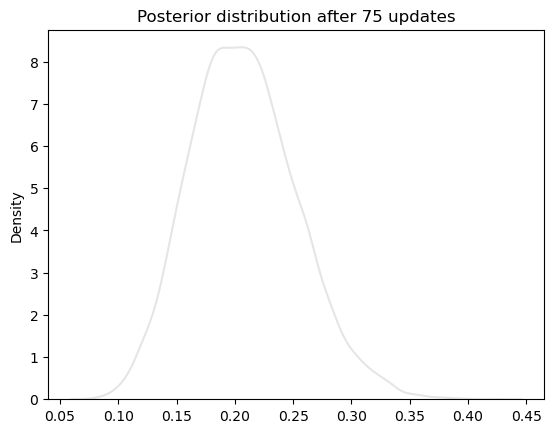

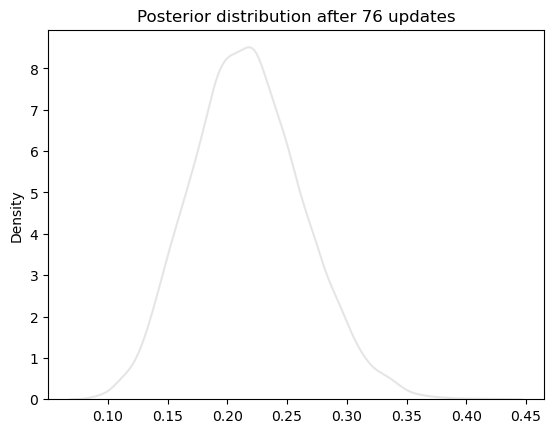

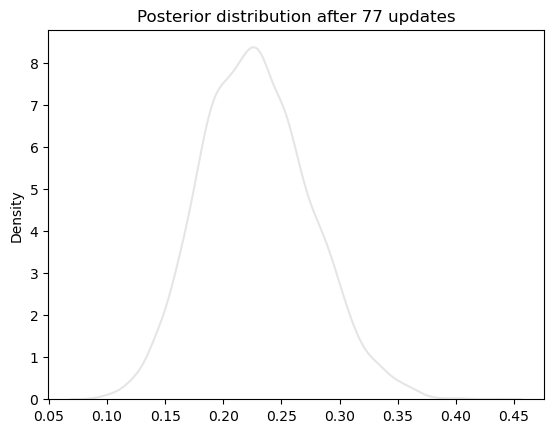

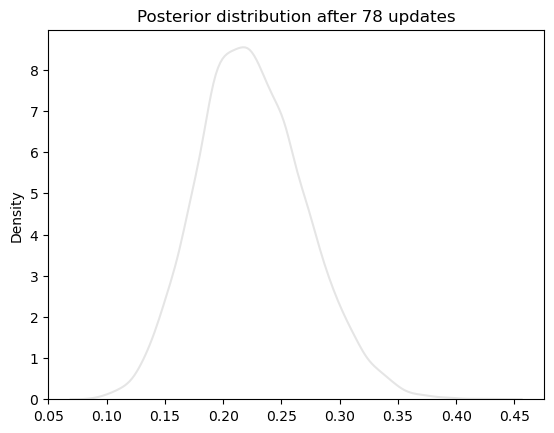

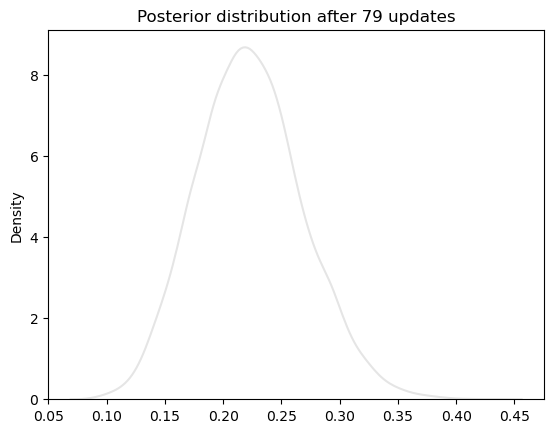

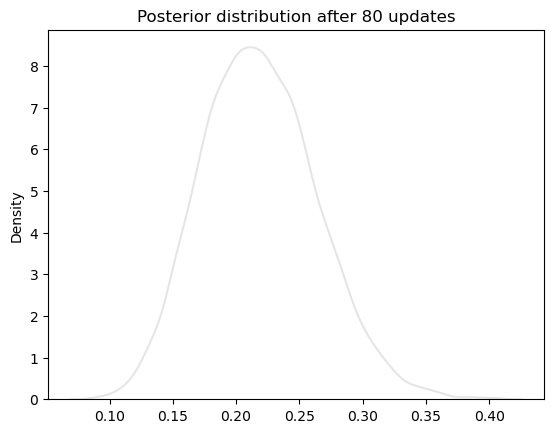

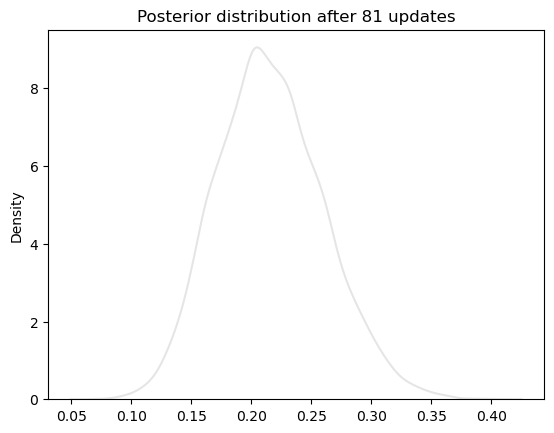

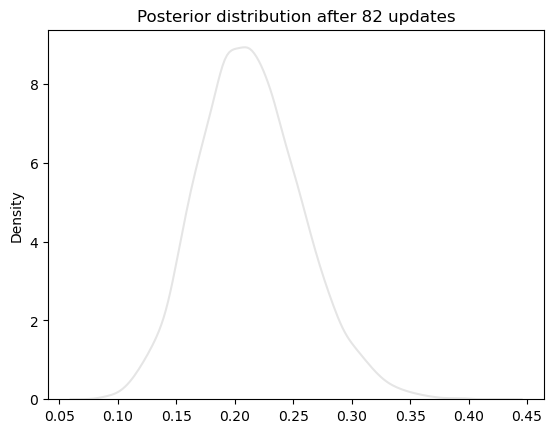

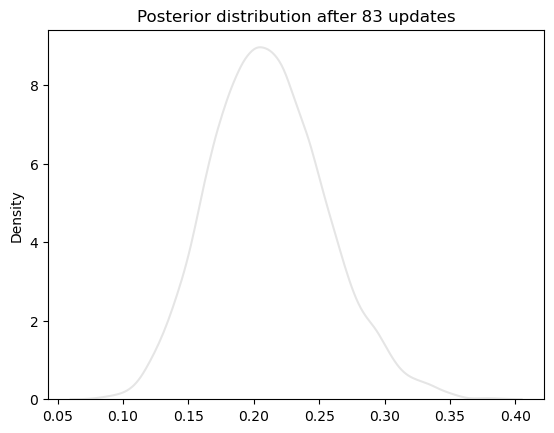

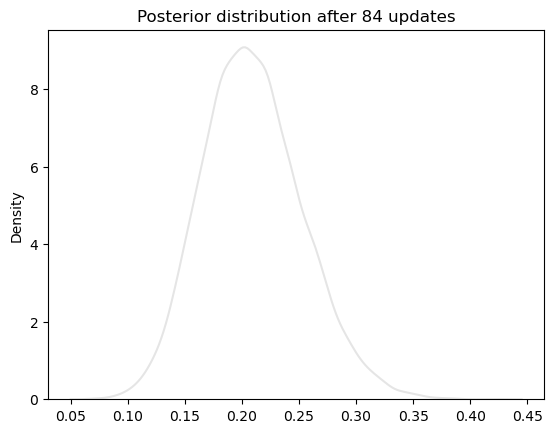

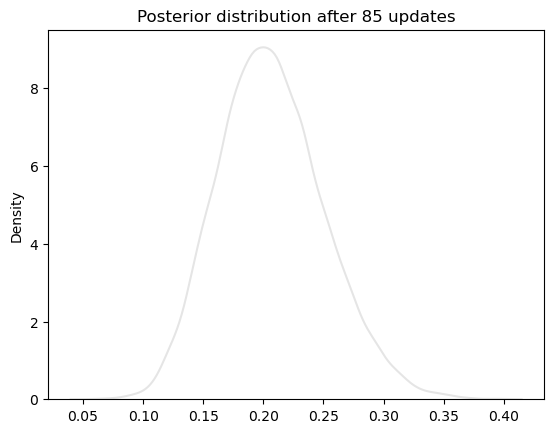

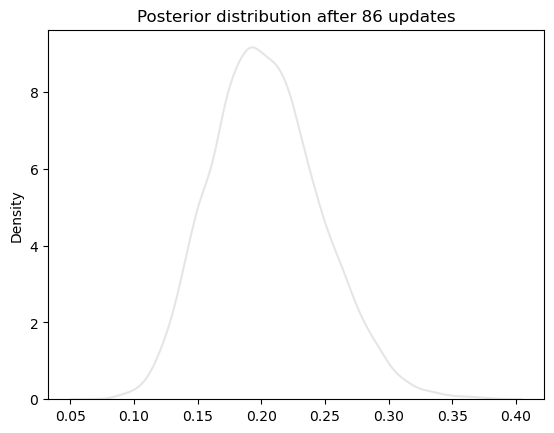

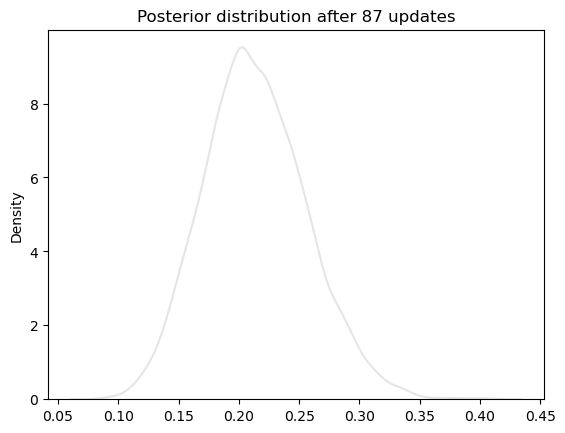

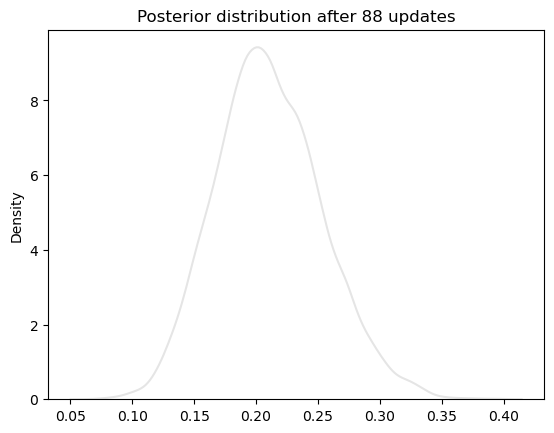

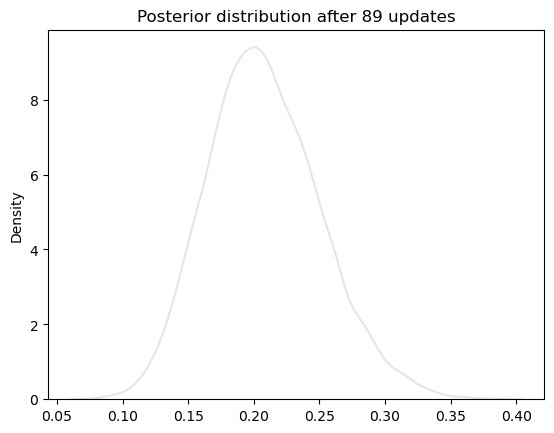

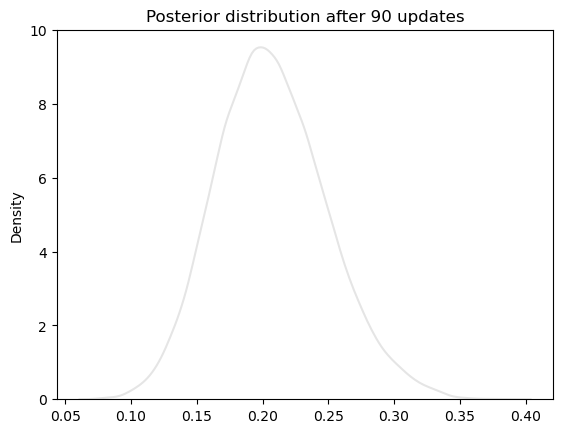

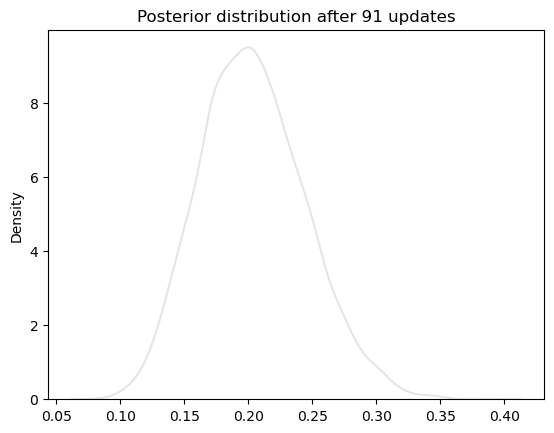

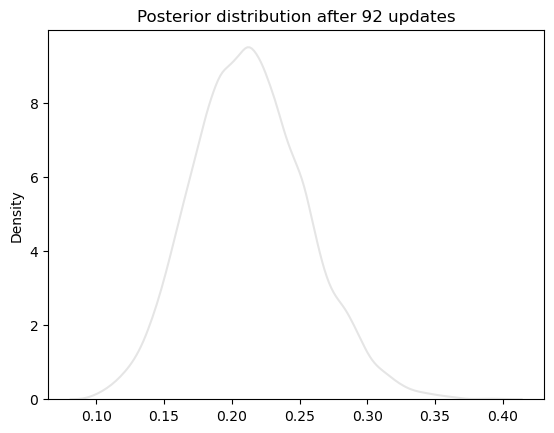

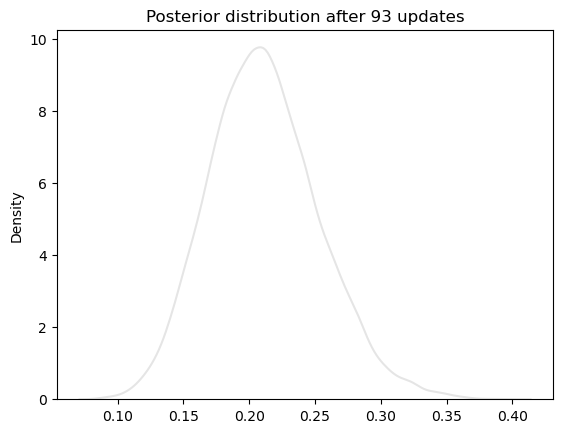

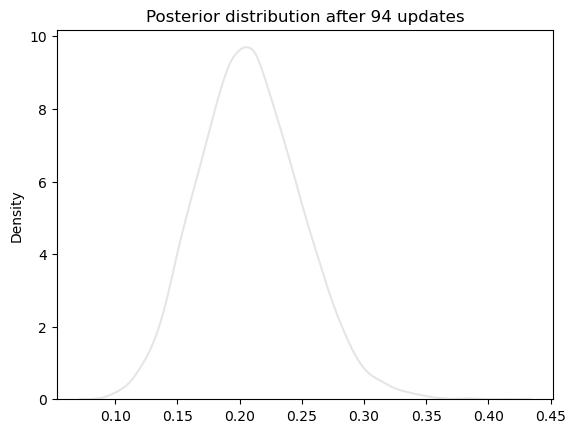

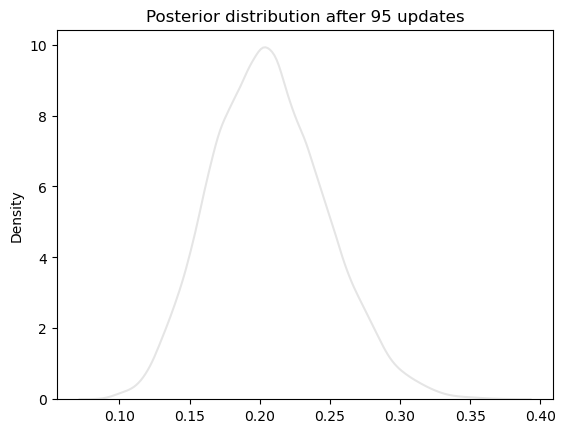

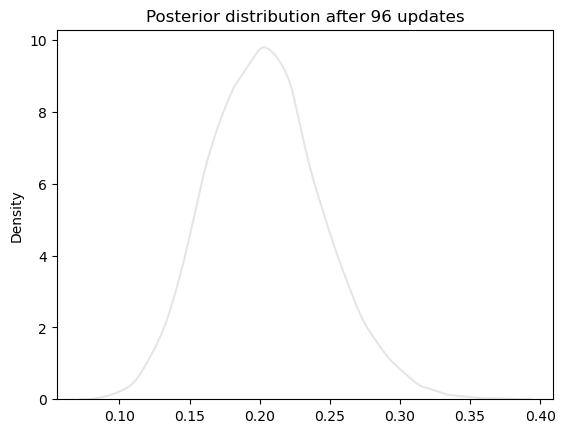

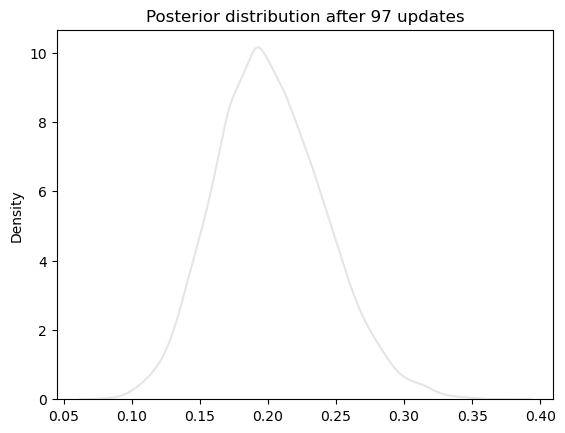

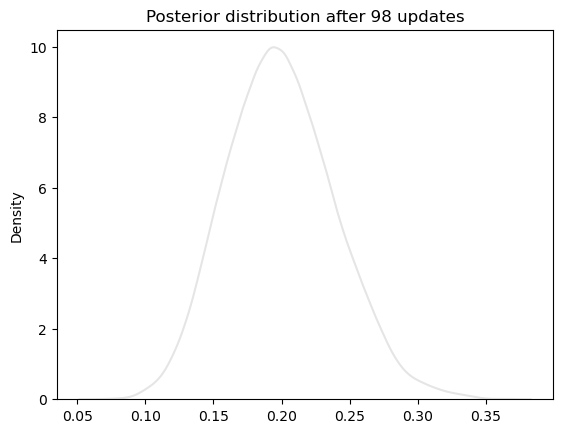

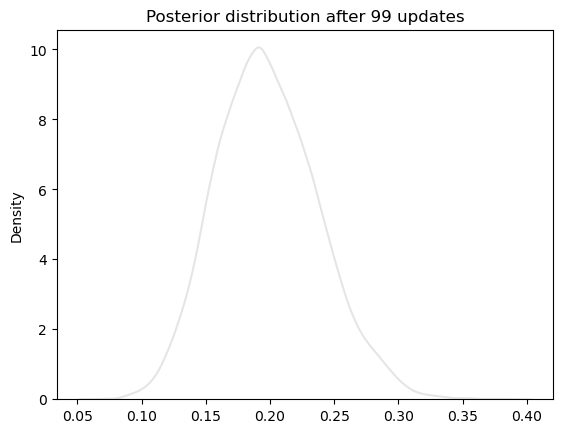

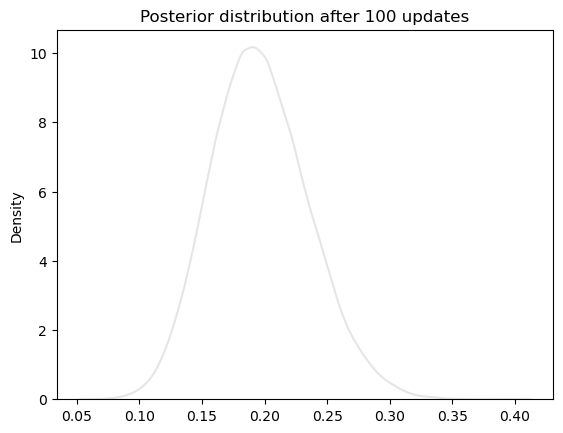

In [28]:
def bayesian_update(dataset):
    # 1- Definition of the prior distribution of theta and creation of a grid of points
    x_grid = np.linspace(0, 1, 100)
    prior_distribution = np.ones(len(x_grid)) / len(x_grid)

    for z,v in enumerate(dataset):
        # 2- Calculate the likelihood of the data given theta

    # The exercise wants us to choose the best distribution to compute the likelihood:
    # Defining the recession as succes which takes the value (1) and no recession (0),
    # There is n cases then it is a sum of bernoulli distribution which gives the binomial,
    # Distribution and the probability of succes is given by the value of theta (0.314)
    
        likelihood = stats.binom.pmf(v, 1, x_grid)

        # 3- Computing of the posterior distribution
        posterior = prior_distribution * likelihood

        # 4-  Normalizing of  the posterior distribution
        posterior = posterior / np.sum(posterior)

        # 5- Updating of the prior with the posterior distribution
        prior_distribution = posterior

        # Plot the final posterior distributions after each updates

         # The choice of plotting each posterior distribution is made because plotting all posterior distributions
         # on the same graph does not help us to see the evolution of the belief overtime
         
        sns.kdeplot(np.random.choice(x_grid, size=10000, p=posterior), color='black', alpha=0.1)
        plt.title(f'Posterior distribution after {z+1} updates')
        plt.show()

# Simualtion using 100 observations
dataset = np.random.binomial(1, 0.314, size=100)
bayesian_update(dataset)